# RISK BASED PRIORITIZATION TECHNIQUES 
Case Study: The Chief Sommelier of the United States

## EXPLORATION

In [6]:
import os
os.getcwd()

'/Users/ryantuggle/Repositories/RiskBasedPrioritization/Scripts'

In [7]:
import numpy as np
import pandas as pd
whitedata = np.genfromtxt('../Data/winequality-white.csv',delimiter=',',names=True)
brands = pd.read_csv('../Data/wine-brand.csv', header = 0)

### Sneak-A-Peak

In [8]:
df = pd.DataFrame(whitedata)
df['brand'] = brands
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,brand
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,summer sparkling splashed reisling
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,sparkling gloaming enchanted reisling
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,penguin equinox leaping moscato
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,golden moon splashed chardonnay
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,oaky moon soaring semillon


### Summary Statistics

In [9]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d482250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115b00090>]], dtype=object)

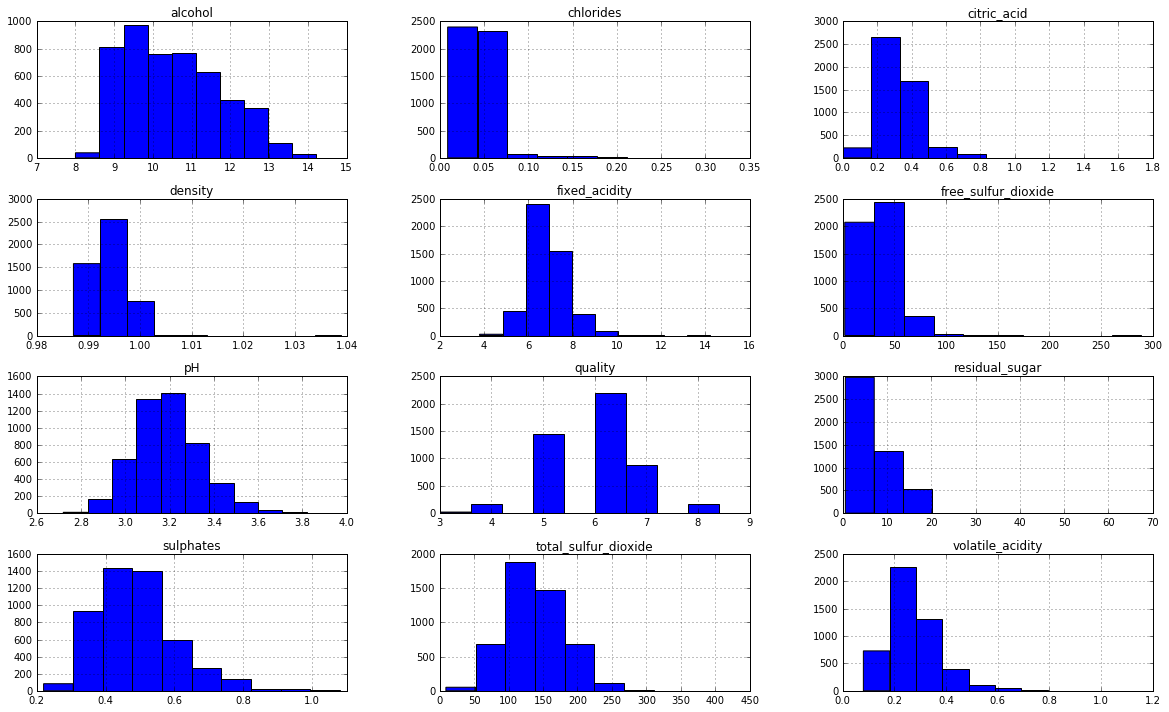

In [10]:
from matplotlib import pylab as pl
%matplotlib inline
df[df.columns[0:12]].hist(figsize=(20,12))

### Scatter Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115c1db50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118cdc650>]], dtype=object)

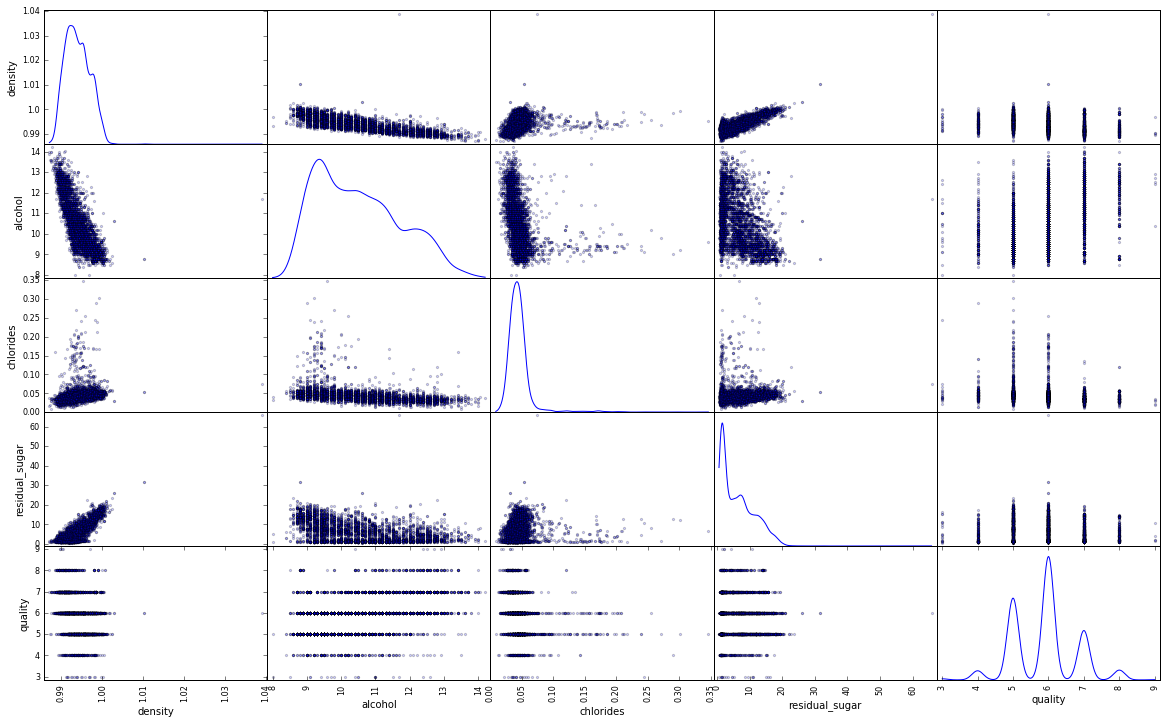

In [11]:
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[['density','alcohol','chlorides','residual_sugar','quality']], 
               alpha=0.2, figsize=(20, 12), diagonal='kde')

### Dimensionality Reduction 

In [12]:
##CREATE ARRAYS OF ATTRIBUTES FOR USE IN STATISTICAL TECHNIQUES
from sklearn import preprocessing as pre
#create 2 dimensional array of attributes with quality attribute
names = list(whitedata.dtype.names)
Xdata = np.array([whitedata[name] for name in names]).transpose()
Xsca = pre.scale(Xdata)
#create 2 dimensional array without quality attribute
names.remove('quality')
Xdata_nq = np.array([whitedata[name] for name in names]).transpose()
Xsca_nq = pre.scale(Xdata_nq)

(4898, 3)


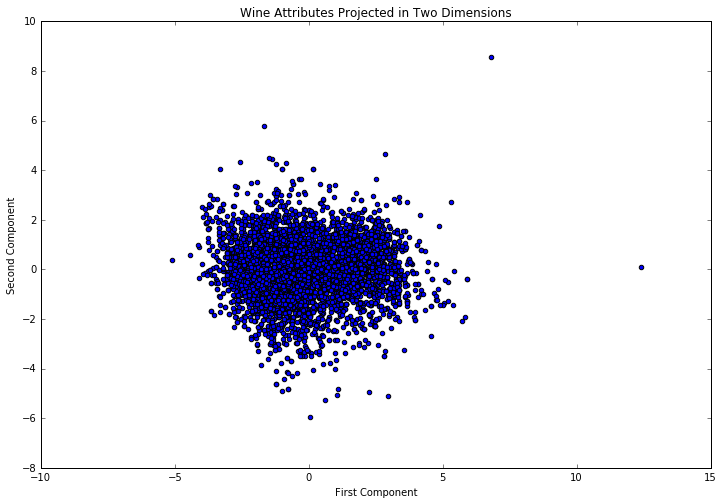

In [13]:
from sklearn.decomposition import TruncatedSVD
#from mpl_toolkits.mplot3d import Axes3D
svd = TruncatedSVD(n_components=3)
svd.fit(Xsca)
Xrot = svd.transform(Xsca)
print Xrot.shape
fig = pl.figure(figsize=(12,8))
pl.title('Wine Attributes Projected in Two Dimensions')
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Xrot[np.random.choice(,0],Xrot[:,1],Xrot[:,2])
#ax.scatter(Xrot[indices[0],0],Xrot[indices[0],1],Xrot[indices[0],2], c='r', marker='*', s=80)
pl.scatter(Xrot[:,0],Xrot[:,1])
#pl.scatter(Xrot[indices[0],0],Xrot[indices[0],1], c='r', marker='*', s=200)
pl.xlabel('First Component')
pl.ylabel('Second Component')
pl.show()

## MODELING

### Clustering

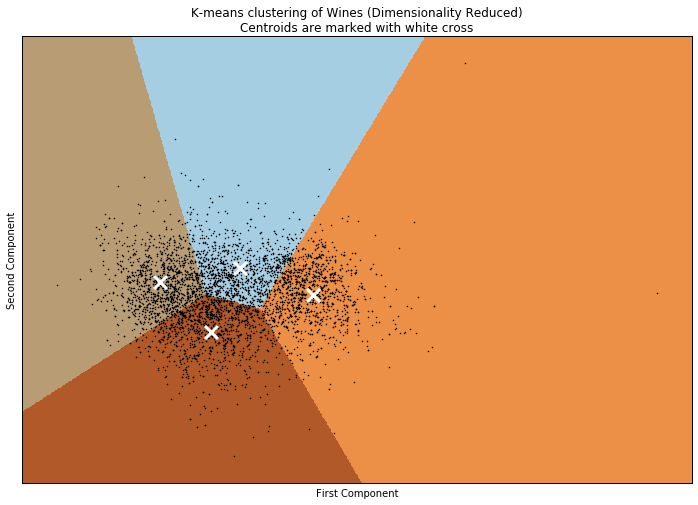

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=1)
reduced_data = Xrot[:,0:2]
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering of Wines (Dimensionality Reduced)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

### Classification

#### Nearest Neighbors

In [15]:
pick = 98
print(df.iloc[pick])
find = Xsca[pick,:]

fixed_acidity                                      9.8
volatile_acidity                                  0.36
citric_acid                                       0.46
residual_sugar                                    10.5
chlorides                                        0.038
free_sulfur_dioxide                                  4
total_sulfur_dioxide                                83
density                                         0.9956
pH                                                2.89
sulphates                                          0.3
alcohol                                           10.1
quality                                              4
brand                   hidden moon splashed semillon 
Name: 98, dtype: object


In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
neighbors = NearestNeighbors(n_neighbors=10, algorithm='brute').fit(Xsca)
distances, indices = neighbors.kneighbors(find)
for i in range(len(indices[0])):
  print "%2f  %s" % (distances[0][i], df.brand[indices[0][i]])

0.000000  hidden moon splashed semillon 
1.466411  gloaming frog enchanted chardonnay 
2.343017  spring beguiling leaping sauvignon blanc 
2.379129  frog hidden enchanted pinot gris 
2.569685  honeybee spring enchanted chardonnay 
2.643458  equinox moon splashed semillon 
2.735275  equinox penguin splashed moscato 
2.753440  seaside beguiling diving reisling 
2.788180  spring seaside diving reisling 
2.831303  mossy equinox splashed chardonnay 


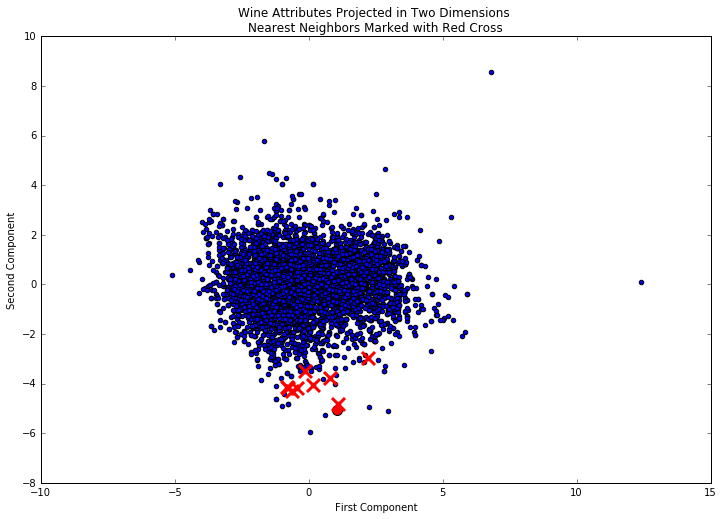

In [18]:
fig = pl.figure(figsize=(12,8))
pl.title('Wine Attributes Projected in Two Dimensions \n'
         'Nearest Neighbors Marked with Red Cross' )
pl.scatter(Xrot[:,0],Xrot[:,1])
pl.scatter(Xrot[pick,0],Xrot[pick,1], c='r', s=100)
pl.scatter(Xrot[indices[0,1:],0],Xrot[indices[0,1:],1], c='r', 
           marker='x', s=169, linewidths = 3)
pl.xlabel('First Component')
pl.ylabel('Second Component')
pl.show()

#### Support Vector Machine

In [19]:
##ADD LABELS, SUMMARIZE
classlabel = np.genfromtxt('../Data/winequality-2classlabels-white.csv',delimiter=',',names=True)
ldf = df
ldf['yum'] = pd.DataFrame(classlabel)
ldf.yum = ldf.yum.apply(lambda x:int(x))
print ldf.yum.describe()

count    4898.000000
mean        0.334831
std         0.471979
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: yum, dtype: float64


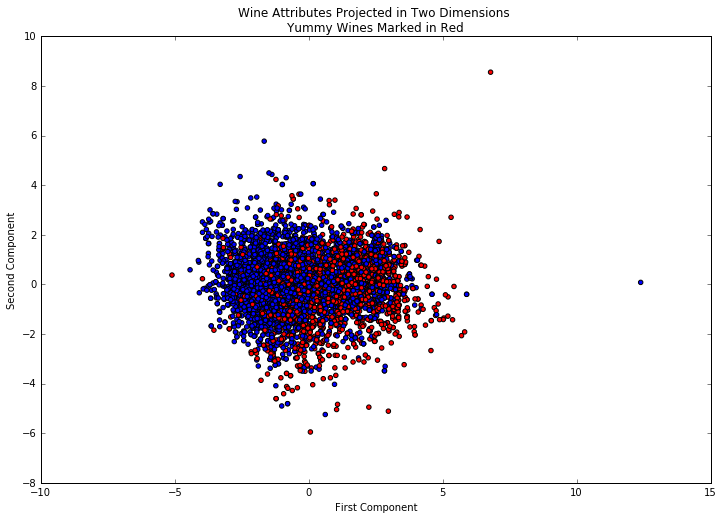

In [20]:
##VISUALIZE LABELED WINES IN REDUCED DIMENSIONS
colors = ['blue','red']
fig = pl.figure(figsize=(12,8))
pl.title('Wine Attributes Projected in Two Dimensions \n'
        'Yummy Wines Marked in Red')
pl.scatter(Xrot[:,0],Xrot[:,1], c=ldf.yum.apply(lambda x:colors[x]))
pl.xlabel('First Component')
pl.ylabel('Second Component')
pl.show()


In [21]:
##SPLIT DATA INTO TRAINING AND TESTING SETS 
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    Xsca_nq, classlabel, test_size=0.3, random_state=0)
print '--TRAINING SET--'
print 'Total wines in set: ', format(len(y_train), ",d")
print 'Of which, Yummy Wines: ', format(sum([int(x[0]) for x in y_train.tolist()]), ",d")
print '\n--TEST SET--'
print 'Total Wines set: ', format(len(y_test), ",d")
print 'Of which, Yummy Wines: ', format(sum([int(x[0]) for x in y_test.tolist()]), ",d")

--TRAINING SET--
Total wines in set:  3,428
Of which, Yummy Wines:  1,113

--TEST SET--
Total Wines set:  1,470
Of which, Yummy Wines:  527


In [ ]:
##FIT THE SVM MODEL ON THE TRAINING SET, OUTPUT THE MEAN ACCURACY SCORE ON TEST SET
from sklearn import svm
clf = svm.SVC( probability=True, random_state=0)
clf = clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)
probas_svm = clf.predict_proba(X_test)
print '--Support Vector Machine-- \nMean Accuracy Score: ', clf.score(X_test, y_test)

In [ ]:
##GENERATE A ROC CURVE TO EVALUATE THE PERFORMANCE
from sklearn.metrics import roc_curve, auc
pl.figure(figsize=(12,8))
fpr, tpr, thresholds = roc_curve([x[0] for x in y_test.tolist()], probas_svm[:, 1])
roc_auc = auc(fpr,tpr)
pl.plot(fpr, tpr, label='ROC curve, SVM (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--') # coin toss line
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver Operating Characteristic Curve \n'
        'Wine Picker Support Vector Machine Performance')
pl.legend(loc="lower right")
pl.show()

## TREATMENT

### Confusion Matrix

In [ ]:
##DEFINE FUNCTION TO PLOT CONFUSION MATRIX
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=pl.cm.Blues):
    pl.figure(figsize=(12,7))
    pl.imshow(cm, interpolation='nearest', cmap=cmap)
    pl.title(title)
    pl.colorbar()
    tick_marks = np.arange(2)
    pl.xticks(tick_marks, ['yuck','yum'], rotation=45)
    pl.yticks(tick_marks, ['yuck','yum'])
    pl.tight_layout()
    pl.ylabel('True label')
    pl.xlabel('Predicted label')
    pl.text(0,0,cm[0,0], color='w', fontsize = 20)
    pl.text(1,0,cm[0,1], color='darkblue', fontsize = 20)
    pl.text(0,1,cm[1,0], color='darkblue', fontsize = 20)
    pl.text(1,1,cm[1,1], color='darkblue', fontsize = 20)

In [ ]:
##CALCULATE CONFUSION MATRIX SCORES
print 'Total Wines in TEST set: ', format(len(y_test), ",d")
print 'Of which, Yummy Wines: ', format(sum([int(x[0]) for x in y_test.tolist()]), ",d")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix([x[0] for x in y_test.tolist()], [x[0] for x in y_pred_svm.tolist()])
plot_confusion_matrix(cm)

## APPENDIX

In [ ]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf = clf.fit(X_train,y_train)
y_pred_log = clf.predict(X_test)
probas_log = clf.predict_proba(X_test)
print '--Logistic Regression-- \nMean Accuracy Score: ', clf.score(X_test, y_test)

In [ ]:
print 'Total Wines in TEST set: ', format(len(y_test), ",d")
print 'Of which, Yummy Wines: ', format(sum([int(x[0]) for x in y_test.tolist()]), ",d")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix([x[0] for x in y_test.tolist()], [x[0] for x in y_pred_log.tolist()])
plot_confusion_matrix(cm)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
probas_tree = clf.predict_proba(X_test)
print '--Decision Tree-- \nMean Accuracy Score: ', clf.score(X_test, y_test)

In [ ]:
cm = confusion_matrix([x[0] for x in y_test.tolist()], [x[0] for x in y_pred_tree.tolist()])
plot_confusion_matrix(cm)

In [ ]:
from sklearn.metrics import roc_curve, auc
pl.figure()
fpr, tpr, thresholds = roc_curve([x[0] for x in y_test.tolist()], probas_svm[:, 1])
roc_auc = auc(fpr,tpr)
pl.plot(fpr, tpr, label='ROC curve, SVM (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve([x[0] for x in y_test.tolist()], probas_log[:, 1])
roc_auc = auc(fpr,tpr)
pl.plot(fpr, tpr, label='ROC curve, Logistic (area = %0.2f)' % roc_auc)
##can't draw ROC curves for trees :(
#fpr, tpr, thresholds = roc_curve(y_test, probas_tree[:, 1])
#roc_auc = auc(fpr,tpr)
#pl.plot(fpr, tpr, label='ROC curve, Tree (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--') # coin toss line
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()